# 3.1

In [1]:
import scipy.io as scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.linalg as lg
from eval_basis import *
from func_gauss import *
from func_hat import *
from gauss_basis import *
from hat_basis import *

In [2]:


# Least-Squared Error FIT
#  Find the linear combination of basis functions which best model the data.
#
#  Inputs:
#  
#  x - Vector with observation locations in 1D. (indep. variable)
#  t - Vector with observations in 1D. (dep. variable)
#  params - Parameters for the basis functions to be used in func, e.g. as
#    produced by gauss_basis.
#  func - Function handle which evaluates a basis function with parameters
#    given by the columns of params and at the specified locations. e.g. 
#    @gauss_basis, or @hat_basis.
#    For example, the first basis function at x = 2 is func(2, params(:,1)).
#  mu - Scalar representing the standard deviation of the prior Gaussian on
#    the model parameters.
#
#  Outputs:
#  w - Coefficients used to generate a linear combination of the basis 
#    functions which is the maximum likelihood learned model.

def lsefit(x, t, params, func, mu): 
    design_matrix = better_eval_basis(params = params,
                                      func = func,
                                      xeval = x)
    
    w_hat = lg.inv(np.dot(np.transpose(design_matrix), design_matrix) + 
                   np.identity(design_matrix.shape[1])*(1/mu**2))
    w = np.dot(w_hat, np.dot(np.transpose(design_matrix), t))
    return w
    
    

In [3]:
lab_4_dat = scipy.loadmat('/Users/wyattmadden/Documents/school/' + 
                           'MSU/2020/spring/m508/lab_info/lab_4/simple.mat',
                           squeeze_me = True)

x = lab_4_dat['x']
t = lab_4_dat['t']

# 3.2

[Text(0.5,1,'mu = 10,000')]

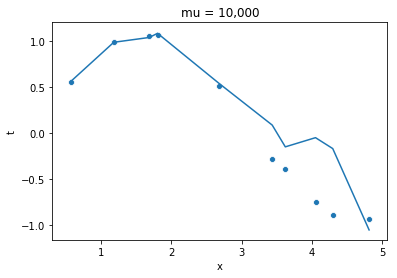

In [43]:
hat_ten_10000 = lsefit(x = x,
                       t = t,
                       params = hat_basis(0, 2*np.pi, len(x)),
                       func = func_hat, 
                       mu = 10**5)

hat_df = {'hat_ten_10000': np.dot(np.transpose(hat_ten_10000), 
                                  np.transpose(better_eval_basis(hat_basis(0, 2*np.pi, len(x)), 
                                                                 func_hat, 
                                                                 x))),
         'x': x,
         't': t}

hat_df = pd.DataFrame(hat_df)

sns.lineplot(x = "x", y = "hat_ten_10000", data = hat_df)
sns.scatterplot(x = "x", y = "t", data = hat_df).set(title = "mu = 10,000")

The fit of the hat basis function with mu of 10,000 is not a good approximation of the data. It is too responsive to subsequent data points, especially on the lower end of the x space. 

# 3.3

[Text(0.5,1,'mu = 10')]

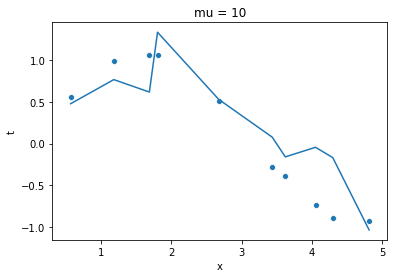

In [44]:
hat_ten_10 = lsefit(x = x,
                    t = t,
                    params = hat_basis(0, 2*np.pi, len(x)),
                    func = func_hat, 
                    mu = 10)
hat_ten_1 = lsefit(x = x,
                    t = t,
                    params = hat_basis(0, 2*np.pi, len(x)),
                    func = func_hat, 
                    mu = 1)

hat_df = {'hat_ten_10': np.dot(np.transpose(hat_ten_10), 
                                  np.transpose(better_eval_basis(hat_basis(0, 2*np.pi, len(x)), 
                                                                 func_hat, 
                                                                 x))),
          'hat_ten_1': np.dot(np.transpose(hat_ten_1), 
                                  np.transpose(better_eval_basis(hat_basis(0, 2*np.pi, len(x)), 
                                                                 func_hat, 
                                                                 x))),
         'x': x,
         't': t}

hat_df = pd.DataFrame(hat_df)

sns.lineplot(x = "x", y = "hat_ten_10", data = hat_df)
sns.scatterplot(x = "x", y = "t", data = hat_df).set(title = "mu = 10")


[Text(0.5,1,'mu = 1')]

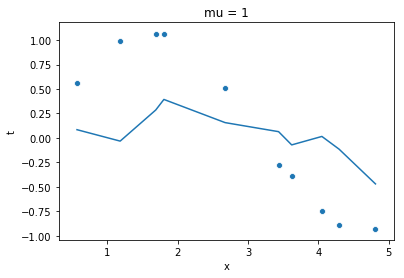

In [45]:
sns.lineplot(x = "x", y = "hat_ten_1", data = hat_df)
sns.scatterplot(x = "x", y = "t", data = hat_df).set(title = "mu = 1")

# 3.4

# 3.5

[Text(0.5,1,'mu = 10,000')]

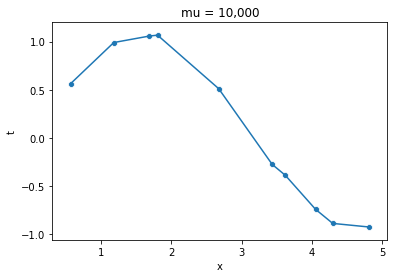

In [48]:
gauss_ten_10000 = lsefit(x = x,
                       t = t,
                       params = gauss_basis(0, 2*np.pi, len(x)),
                       func = func_gauss, 
                       mu = 10**5)

gauss_df = {'gauss_ten_10000': np.dot(np.transpose(gauss_ten_10000), 
                                  np.transpose(better_eval_basis(gauss_basis(0, 2*np.pi, len(x)), 
                                                                 func_gauss, 
                                                                 x))),
            'x': x,
            't': t}

gauss_df = pd.DataFrame(gauss_df)

sns.lineplot(x = "x", y = "gauss_ten_10000", data = gauss_df)
sns.scatterplot(x = "x", y = "t", data = hat_df).set(title = "mu = 10,000")

# 3.6

[Text(0.5,1,'mu = 10')]

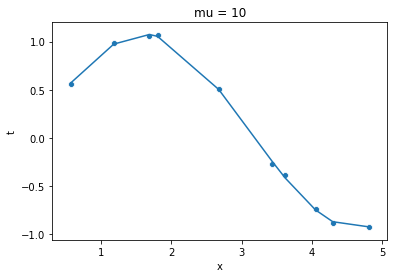

In [49]:
gauss_ten_10 = lsefit(x = x,
                      t = t,
                      params = gauss_basis(0, 2*np.pi, len(x)),
                      func = func_gauss, 
                      mu = 10)

gauss_df = {'gauss_ten_10': np.dot(np.transpose(gauss_ten_10), 
                                  np.transpose(better_eval_basis(gauss_basis(0, 2*np.pi, len(x)), 
                                                                 func_gauss, 
                                                                 x))),
            'x': x,
            't': t}

gauss_df = pd.DataFrame(gauss_df)

sns.lineplot(x = "x", y = "gauss_ten_10", data = gauss_df)
sns.scatterplot(x = "x", y = "t", data = hat_df).set(title = "mu = 10")

[Text(0.5,1,'mu = 1')]

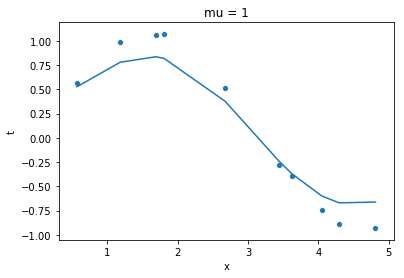

In [50]:
gauss_ten_1 = lsefit(x = x,
                     t = t,
                     params = gauss_basis(0, 2*np.pi, len(x)),
                     func = func_gauss, 
                     mu = 1)

gauss_df = {'gauss_ten_1': np.dot(np.transpose(gauss_ten_1), 
                                  np.transpose(better_eval_basis(gauss_basis(0, 2*np.pi, len(x)), 
                                                                 func_gauss, 
                                                                 x))),
            'x': x,
            't': t}

gauss_df = pd.DataFrame(gauss_df)

sns.lineplot(x = "x", y = "gauss_ten_1", data = gauss_df)
sns.scatterplot(x = "x", y = "t", data = hat_df).set(title = "mu = 1")

# 3.7

# 3.8

# 3.9

# 3.10

[Text(0.5,1,'mu = 1')]

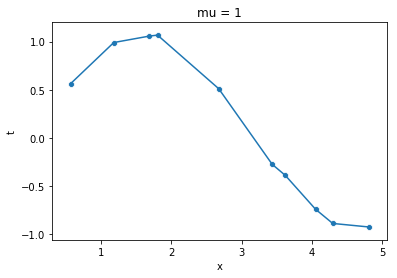

In [51]:
gauss_ten_1 = lsefit(x = x,
                     t = t,
                     params = gauss_basis(0, 2*np.pi, 100),
                     func = func_gauss, 
                     mu = 1)

gauss_df = {'gauss_ten_1': np.dot(np.transpose(gauss_ten_1),
                                  np.transpose(better_eval_basis(gauss_basis(0, 2*np.pi, 100),
                                                                 func_gauss, x))),
            'x': x,
            't': t}

gauss_df = pd.DataFrame(gauss_df)

sns.lineplot(x = "x", y = "gauss_ten_1", data = gauss_df)
sns.scatterplot(x = "x", y = "t", data = hat_df).set(title = "mu = 1")